# Analysis of the data

Imports

In [38]:
import pandas as pd
import numpy as np
import os
import re
from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer
import operator
import itertools
import nltk
from tqdm import tqdm
import seaborn as sns

import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

GLOBAL VARIABLES

In [3]:
ROOT_DIR = os.path.normpath(os.path.join(os.path.dirname(os.path.realpath("__file__")), ".."))
DATA_DIR = os.path.join(ROOT_DIR, "data")
MAX_SYNOPSIS_LEN = 150

print(ROOT_DIR)
print(DATA_DIR)

/home/alejandro/Dropbox/Carpeta personal/Universidad - Master/2º Semestre/Natural Computing/films-synopsis-generator
/home/alejandro/Dropbox/Carpeta personal/Universidad - Master/2º Semestre/Natural Computing/films-synopsis-generator/data


Load the data

In [5]:
df = pd.read_csv(filepath_or_buffer  = os.path.join(DATA_DIR,'synopsis_genres.csv'),sep = '#',encoding = 'latin_1',index_col = 'ID')
df = df[df['Synopsis'].notnull() & df['Genre'].notnull()]
df.info()
print(str(df.head()).encode('latin1'))

<class 'pandas.core.frame.DataFrame'>
Index: 114451 entries, https://www.filmaffinity.com/es/film740563.html to https://www.filmaffinity.com/es/film469189.html
Data columns (total 2 columns):
Genre       114451 non-null object
Synopsis    114451 non-null object
dtypes: object(2)
memory usage: 2.6+ MB
b'                                                                                             Genre  \\\nID                                                                                                   \nhttps://www.filmaffinity.com/es/film740563.html                                            Comedia   \nhttps://www.filmaffinity.com/es/film275936.html  Infantil|Comedia|Animales|Perros/Lobos|Deporte...   \nhttps://www.filmaffinity.com/es/film697174.html                                      Drama|Secuela   \nhttps://www.filmaffinity.com/es/film775580.html                         Acci\xf3n|Aventuras|Espionaje   \nhttps://www.filmaffinity.com/es/film303582.html  Animaci\xf3n|Drama|Cortom

Total number of training points

In [6]:
caps = list(df['Synopsis'].map(lambda s : ' '.join(re.findall(r"[\w]+|[^\s\w]", s)).lower()).values)

total_samples=0
for text in caps:
    total_samples+=len(text.split())-1
print("Total samples : "+str(total_samples))

Total samples : 7751265


Check for the length of the sentences

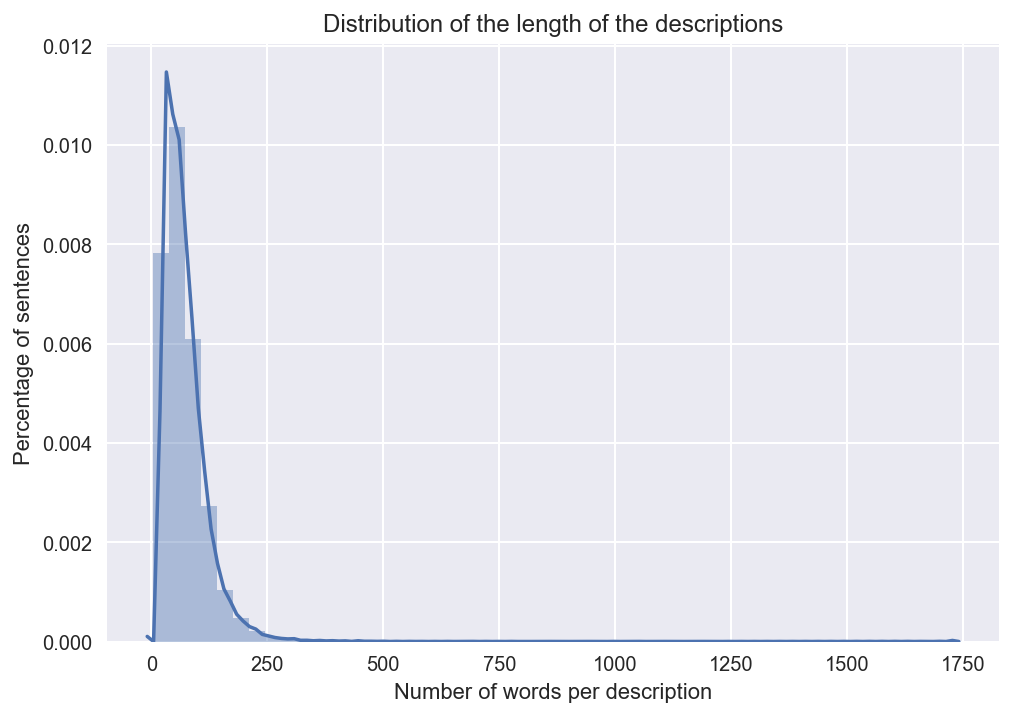

In [17]:

spl_by_word = [txt.split() for txt in caps]

lengths = [len(entry) for entry in spl_by_word]


# Graph option 1
x = np.array(lengths)
sns.set(color_codes=True)
plot = sns.distplot(x);
plot.set(xlabel='Number of words per description', ylabel='Percentage of sentences', title="Distribution of the length of the descriptions")
plt.show()

# Graph option 2
# num_bins = range(1, 1000)
#plt.hist(x,  bins=num_bins, rwidth=2)
#plt.title("Distribution of the length of the descriptions")
#plt.xlabel("Number of words")
#plt.ylabel("Number of descriptions")
#plt.xlim(0,1000)
#plt.show()

Show some long sentences

In [44]:
count = 0
for i, value in enumerate(x):
    if value > 200:
        print(caps[i]+'\n========================')
        count += 1
    if count >= 3:
        break

en la época de decadencia del shogunato de los tokugawa , el emperador enviaba tropas a los pueblos para liberar a los siervos del shogun . gonzo , un soldado que formaba parte de esas tropas , tras llegar a las cercanías de su pueblo , decide adelantarse y hacerse pasar por el capitán para difundir un mensaje . pero en el pueblo tendrá que lidiar con los comerciantes corruptos y el actual administrador jefe .
remake en inglés de la premiada serie de québec del mismo nombre .
la policía montada del canadá trata de mantener la paz entre los sioux y los rancheros locales . entre los dos bandos surgirá una terrible batalla .


Get some basic information about the text corpus we have

In [45]:
raw_words = []

for descrp in caps:
    raw_words.extend(descrp.split())

print("Total number of words: %d " % len(raw_words))
vocabulary = set(raw_words)
print("Size of vocabulary: %d " % len(vocabulary))


Total number of words: 7865716 
Size of vocabulary: 151852 


How about the frequency of our words

In [46]:
# Get all the words the occur only once for the given wordlist
desired_value = 3
myDict = dict(Counter(raw_words))
hapax_legomena = [k for k, v in myDict.items() if v <= desired_value]
print("Words that appear 3 times or less: %d " % len(hapax_legomena))
desired_value = 2
hapax_legomena = [k for k, v in myDict.items() if v <= desired_value]
print("Words that appear 2 times or less: %d " % len(hapax_legomena))
desired_value = 1
hapax_legomena = [k for k, v in myDict.items() if v <= desired_value]
print("Words that appear 1 times or less: %d " % len(hapax_legomena))

Words that appear 3 times or less: 100968 
Words that appear 2 times or less: 89855 
Words that appear 1 times or less: 68368 


Get a nice graph of this information

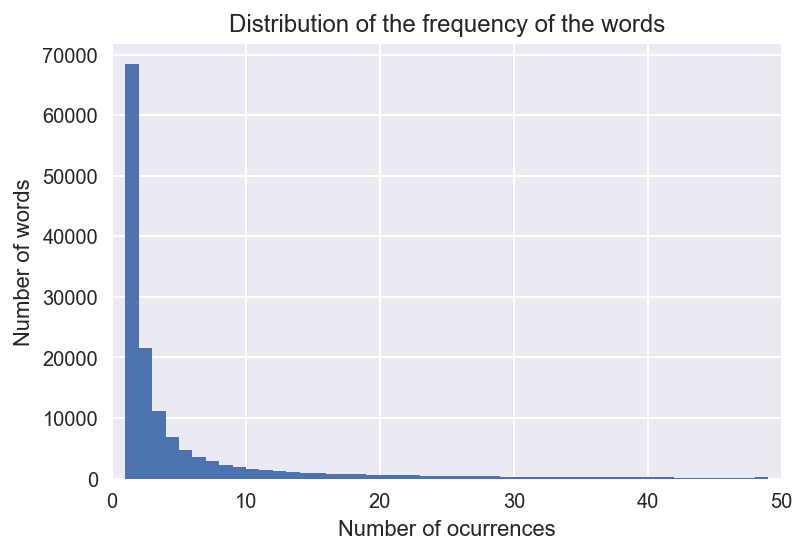

In [47]:
num_bins = range(1, 50)

x = np.asarray(list(myDict.values()))

plt.hist(x,  bins=num_bins, rwidth=2)
plt.title("Distribution of the frequency of the words")
plt.xlabel("Number of ocurrences")
plt.ylabel("Number of words")
plt.xlim(0,50)
plt.show()

Check some words according to their frequency

In [48]:
count = 0
for word, frec in myDict.items():
    if frec == 1:
        print(word+'\n========================')
        count += 1
        
    if count > 100:
        break

sociedade
angiboust
dats
consalero
skafar
glorian
absolutamenta
prejon
germinado
intensidades
massina
simiescos
astonishing
celendino
nebulart
astarté
evitarles
koz
zanda
suharno
peruanidad
basbson
medidores
patrullaba
wszystko
filtraba
arturiana
kelsall
bumps
hyoe
toleró
rukimedsu
minimoy
corozal
conversation
gorostieta
desequilibre
aguantado
uttapol
darmody
tandouji
pisotean
basamento
mineralmente
perrucha
afeitando
rala
vikramjit
hachmi
máo
aubyn
menphis
rezza
añillo
amenizarán
telekinésicos
guixé
painting
fond
zinacantecos
darás
tinnitus
saoud
divertirá
quebequense
zulma
horarias
ridiculizantes
piojera
hallum
coordinarse
belicista
lecheras
wille
grise
polvorón
envejecería
hicisteis
maitre
bettinotti
perseveran
esperarles
fabero
cres
pospo
biogenetista
apagó
hinilawod
antagonica
clercq
tuen
emeraldas
beloved
ninjisticas
aturrullamiento
cronopios
makeevka
sasanatieng
nyankopon
callecitas
rosserys


Check how many words we would substitute for unknown tokens (or delete) if we are using the X most common words of the dataset

In [42]:
VOCAB_SIZE = 50000

freq_dist = nltk.FreqDist(raw_words)
# get vocabulary of 'vocab_size' most used words
vocab = freq_dist.most_common(VOCAB_SIZE)
vocab = [tup[0] for tup in vocab]

kept = 0

for word, frec in tqdm(myDict.items(),miniters=1000):
    if word in vocab:
        kept += frec

print("If we take the {} more common words, we are keeping the {} of the words"
      .format(VOCAB_SIZE, 1 - (len(raw_words) - deleted)/len(raw_words)))

100%|██████████| 151852/151852 [06:47<00:00, 372.97it/s]

If we take the 50000 more common words, we are keeping the 0.9811565787526526 of the words


Check basic information about the labels

In [7]:
mlb = MultiLabelBinarizer()


genres_features = mlb.fit_transform(df['Genre'].map(lambda x: x.split('|')))
print(len(mlb.classes_)," different genres found:",str(mlb.classes_).encode('latin1')[:100],"...")
print(genres_features.shape)


378  different genres found: b"['11-S' '3-D' 'Abusos sexuales' 'Acci\xf3n' 'Acoso escolar' 'Adolescencia'\n 'Adopci\xf3n' 'Ajedrez' 'Alcoh" ...
(114451, 378)


Check the distribution of the classes

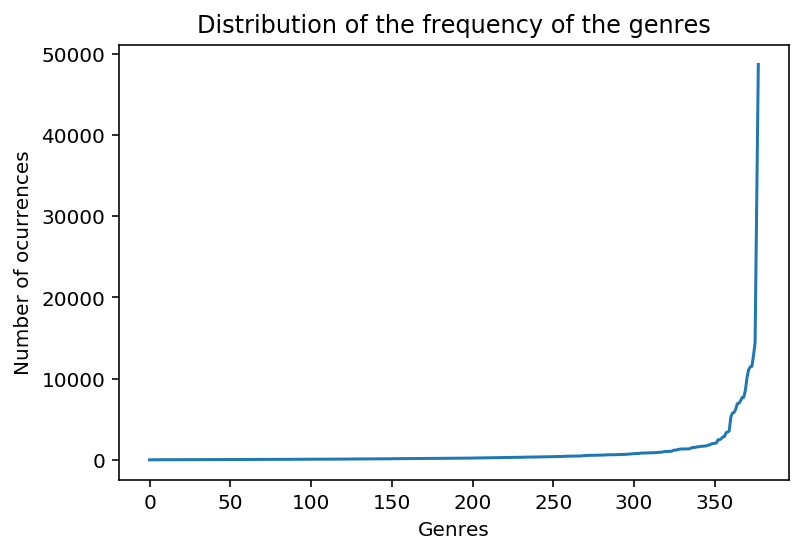

The 10 more common genre are (in descending order): ['Drama' 'Comedia' 'Documental' 'Animación' 'Romance' 'Serie de TV'
 'Thriller' 'Acción' 'Terror' 'Cortometraje']
At least one of these labels is in the 95.52122742483682% of the instances


In [8]:
genres_s = np.cumsum(genres_features, axis=0)[len(genres_features)-1,:]

plt.plot(np.sort(genres_s))
plt.title("Distribution of the frequency of the genres")
plt.xlabel("Genres")
plt.ylabel("Number of ocurrences")
plt.show()

top = 10

most_common = np.sort(genres_s)[len(genres_s)-top:len(genres_s)][::-1]
genres_s = genres_s.tolist()
#indexes = genres_s.tolist().index(np.sort(genres_s)[len(genres_s)-25:len(genres_s)])
indexes = [genres_s.index(value) for value in most_common]
print("The {} more common genre are (in descending order): {}".format(len(indexes),mlb.classes_[indexes]))

count = 0
#df['Genre'].map(lambda x: x.split('|'))
for entry in df['Genre'].map(lambda x: x.split('|')):
    if np.any(np.in1d(mlb.classes_[indexes], entry)):
#    if any mlb.classes_[indexes] in entry:
        count += 1

#print(count)

print("At least one of these labels is in the {}% of the instances".format(count/len(df['Genre'])*100))


Co-occurence Matrices

In [16]:
most_common_text = mlb.classes_[indexes]
most_common_index = indexes
most_common_value = most_common

tags = most_common_text


subset = []
sub_genres_features = genres_features[:,most_common_index]
#df['Genre'].map(lambda x: x.split('|'))
for i, entry in enumerate(df['Genre'].map(lambda x: x.split('|'))):
    if np.any(np.in1d(mlb.classes_[indexes], entry)):
        subset.append(sub_genres_features[i])

np_ground_truth = np.asarray(subset)

#print(np_ground_truth[:20])

# Co-occurence Matrices
com_ground_truth = np.zeros([len(tags)]*2)
for l, tag in enumerate(tags):
        for l2, tag2 in enumerate(tags):
            if np_ground_truth[:,l].sum()>0:
                com_ground_truth[l, l2] = np_ground_truth[:,l].dot(np_ground_truth[:,l2])/np_ground_truth[:,l].sum()
            else:
                com_ground_truth[l, l2] = 0

# Plotting
data=go.Heatmap(z=com_ground_truth, x=list(tags), y=list(tags))

fig = tls.make_subplots(rows=1, cols=2, subplot_titles=('Co-occurrence matrix','Co-occurrence matrix (copy)'))
fig.append_trace(data, 1, 1)
fig.append_trace(data, 1, 2)

py.iplot(fig)


This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]

